In [887]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import scipy.linalg as la

import quantecon as qe

# パラメータセット

In [888]:
# ずっと使ってきたやつ
set_parameter = 1

# ch10
# set_parameter = 1

In [889]:
sig_arr = [-1e-9, -1e-2]
d_first = 0.0
k_first = 0.0

In [890]:
# uncertaintyあり、なし全ての期間を決定
iter_t = 5000

In [891]:
np.random.seed(5)
eps = np.random.randn(iter_t)

In [892]:
ovr = 70
tapple_y = 40
y_lim = (-50, 50)

In [893]:
if set_parameter == 1:
    # Set parameters ずっと使ってきたやつ
    mu_d = 13.0
    rho = 0.05
    gan = 8.0
    c_d = 1.0
    beta = 0.95
    R = 1 / beta
elif set_parameter == 2:
    # Set parameters in ch10
    mu_d = 13.594
    rho = 0.241
    gan = 8.0
    c_d = .2
    beta = 0.997
    R = 1 / beta
elif set_parameter == 3:
    # 自由に変えていいよ
    mu_d = 13.00
    rho = 0.
    gan = 80.0
    c_d = 0.
    beta = 0.93
    R = 1 / beta

# w\o mis 

## in Matlab module

In [894]:
# おまじない
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [895]:
# olrprobust_3はリカッチのif文を削除した
# olrprobust_2との相違点は上記があるか、ないか
from olrprobust_3_using import olrp, olrprobust, doubleo

# olrprobust_2はリカッチのif文有〼
# matlabを極力そのまま移し替えた。
# from olrprobust_2_using import olrp, olrprobust, doubleo

# olrprobust_1はgithubから
# from olrprobust_1_using import olrp,olrprobust,doubleo

In [896]:
# y=[1 d k]のやつ
Q = np.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 1e-9]])
A = np.array([[1.0, 0.0, 0.0], [(1.0 - rho) * mu_d, rho, 0.0], [-gan, 1.0, R]])


# u=\gamma - c_tにしたため符号を反転した
B = np.array([[0.0], [0.0], [1.0]])

C = np.array([[0.0], [c_d], [0.0]])
R_hyouka = np.array([[1]])
R_hyouka=-R_hyouka
F_ro2, K_ro2, P_ro2, Pt_ro2 = olrprobust(beta, A, B, C, Q, R_hyouka, sig_arr[0])

In [859]:
print(-F_ro2)

[[-4.86301326 -0.01052067 -0.0101009 ]]


In [860]:
# print(eps[100])
y = np.array([[1.0, d_first, k_first]])
# print(y[0])
# print(y.shape)
ABF_1 = A - np.dot(B, F_ro2)
for i in range(iter_t):
    # print(i)
    # F, K, P, Pt = olrprobust(beta, A, B, C, Q, R_hyouka, sig)
    # Tmp = A -np.dot(B,F) + np.dot(C,K)
    # print(f"y = \n{np.dot(Tmp, y[0].T) + CLQ.T * eps[i]}")
    # print(y)
    # print(y.shape)
    # print(f"ABF = \n {ABF_1}")
    # print(f"y[0] = \n {y[0]}")
    # print(f"y = \n {y}")
    #print(f"C.T * eps[i] = \n {C.T * eps[i]}")
    y = np.insert(y, 0, np.dot(ABF_1, y[0].T) + C.T * eps[i], axis=0)

# print(y[iter_t-1])

In [861]:
y_1 = y[::-1]
k_get_1 = y_1[:, 2]
d_get_1 = y_1[:, 1]

In [862]:
c_2 = np.zeros(iter_t + 1)
# print("c size before %d"%c.shape)

for i in range(iter_t):
    # print("k = %d"%k_get[(iter_t + 1) * where + i - 1])
    # print(i)
    # print(y[i])
    c_2[i] = F_ro2 @ y_1[i] + gan
    # print("c = %d"%c[i])

In [863]:
print(f"k = \n {k_get_1[:5]}")
print(f"d = \n {d_get_1[:5]}")
print(f"c = \n {c_2[:5]}")

k = 
 [  0.         -12.86301326 -13.06937266 -13.40687398 -11.0183454 ]
d = 
 [ 0.         12.79122749 12.65869122 15.41370575 12.86859316]
c = 
 [12.86301326 12.86765746 12.86417867 12.8897542  12.88710421]


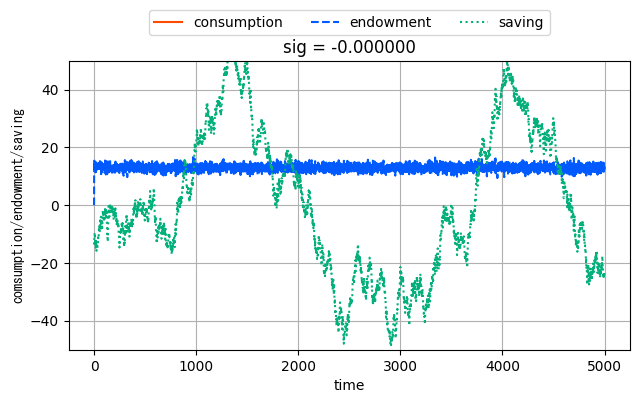

In [864]:
# print(c.shape)
plt.figure(figsize=[6.5, 4.2])
plt.title("sig = %f" % (sig_arr[0]))
plt.ylim(y_lim)
colorlist = ["#FF4B00", "#005AFF", "#03AF7A"]
# Plot consumption
plt.plot(
    np.array(range(iter_t)),
    c_2[:iter_t],
    linestyle="-",
    label="consumption",
    color=colorlist[0],
)

# Plot endowment
plt.plot(
    np.array(range(iter_t)),
    d_get_1[:iter_t],
    linestyle="--",
    label="endowment",
    color=colorlist[1],
)

# Plot saving
plt.plot(
    np.array(range(iter_t - 1)),
    k_get_1[1:iter_t],
    linestyle=":",
    label="saving",
    color=colorlist[2],
)

# Legend with specified arguments
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=3, prop={"size": 10})
plt.xlabel("time", fontsize=10)
plt.ylabel("comsumption/endowment/saving", fontname="MS Gothic", fontsize=10)
plt.grid()
plt.tight_layout()

# plt.axhline(y=gan, xmin=0.0, xmax=iter_t, color="r")

plt.savefig("ch10_1.png")

## in Quant

In [865]:
A = np.array([[1.0, 0.0], [(1.0 - rho) * mu_d, rho]])
C = np.array([[0.0], [c_d]])

# ここでは使わない
G = np.array([[0.0, 1.0]])
G_1 = np.array([[1.0, 0.0]])
A12 = np.zeros((2, 1))
ALQ_l = np.hstack([A, A12])
ALQ_r = np.array([[-gan, 1.0, R]])
ALQ = np.vstack([ALQ_l, ALQ_r])

ep = 1e-9
RLQ = np.array(
    [
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, ep],
    ]
)

QLQ = np.array([1.0])
BLQ = np.array([0.0, 0.0, 1.0]).reshape(3, 1)
CLQ = np.array([0.0, c_d, 0.0]).reshape(3, 1)
beta_LQ = beta

In [866]:
lqpi = qe.LQ(QLQ, RLQ, ALQ, BLQ, C=CLQ, beta=beta_LQ)
P, F_wo_quant, d = lqpi.stationary_values()  # Compute value function and decision rule

## compare both

In [867]:
print(f"F in matlab = \n {F_ro2}")
print(f"F in Quant = \n {F_wo_quant}")

F in matlab = 
 [[4.86301326 0.01052067 0.0101009 ]]
F in Quant = 
 [[4.86322855 0.01052088 0.01010111]]


# w\ mis 

## in Matlab module

In [868]:
# y=[1 d k]のやつ

Q = np.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 1e-9]])
A = np.array([[1.0, 0.0, 0.0], [(1.0 - rho) * mu_d, rho, 0.0], [-gan, 1.0, R]])
B = np.array([[0.0], [0.0], [1.0]])
C = np.array([[0.0], [c_d], [0.0]])
R_hyouka = np.array([[1]])

sdfgsdfg
sdfgsdfg
sdfgsdfg
sdfgsdfg


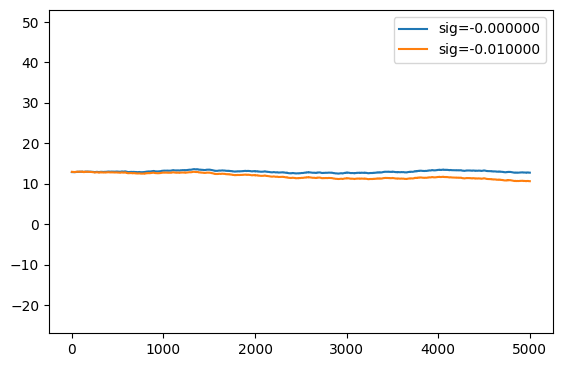

In [869]:
y = np.zeros((1, 3))

plt.figure(figsize=[6.5, 4.2])
plt.ylim((mu_d - tapple_y, mu_d + tapple_y))
for where, sig in enumerate(sig_arr):
    F, K, P, P = olrprobust(beta, A, B, C, Q, R_hyouka, sig)
    # print(-F)

    # print(eps[100])
    y = np.array([[1.0, 0.0, 0.0]])

    ABF = A - np.dot(B, F)
    # print(y[0])
    # print(y.shape)
    for i in range(iter_t):
        # print(i)
        # F, K, P, Pt = olrprobust(beta, A, B, C, Q, R_hyouka, sig)
        # Tmp = A -np.dot(B,F) + np.dot(C,K)
        # print(f"y = \n{np.dot(Tmp, y[0].T) + CLQ.T * eps[i]}")
        # print(y)
        # print(y.shape)
        y = np.insert(y, 0, np.dot(ABF, y[0].T) + C.T * eps[i], axis=0)

    y = y[::-1]

    # print(y[13])

    c = np.zeros(iter_t + 1)
    # print("c size before %d"%c.shape)

    for i in range(iter_t):
        # print("k = %d"%k_get[(iter_t + 1) * where + i - 1])
        # print(i)
        # print(y[i])
        c[i] = F @ y[i] + gan
        # print("c = %d"%c[i])

    # print(c.shape)

    # Plot consumption
    plt.plot(
        np.array(range(1, iter_t)),
        c[1:iter_t],
        linestyle="-",
        label="sig=%f" % sig,
    )

    # Legend with specified arguments
    plt.legend()
    plt.savefig("ch10_combine.png")

### uncertainty included の貯蓄プロット

In [870]:
F_ro2, K_ro2, P_ro2, Pt_ro2 = olrprobust(beta, A, B, C, Q, R_hyouka, sig_arr[1])
print(f"F_ro2 = \n {-F}")


sdfgsdfg
sdfgsdfg
F_ro2 = 
 [[-4.91732108 -0.01063837 -0.01021391]]


In [871]:


#print(eps[100])
y = np.array([[1.0, d_first, k_first]])
# print(y[0])
# print(y.shape)
ABF_1 = A - np.dot(B, F_ro2)
for i in range(iter_t):
    # print(i)
    # F, K, P, Pt = olrprobust(beta, A, B, C, Q, R_hyouka, sig)
    # Tmp = A -np.dot(B,F) + np.dot(C,K)
    # print(f"y = \n{np.dot(Tmp, y[0].T) + CLQ.T * eps[i]}")
    # print(y)
    # print(y.shape)
    y = np.insert(y, 0, np.dot(ABF_1, y[0].T) + C.T * eps[i], axis=0)
    

In [872]:
y_1 = y[::-1]
k_get = y_1[:, 2]
d_get = y_1[:, 1]

In [873]:
c = np.zeros(iter_t + 1)
# print("c size before %d"%c.shape)

for i in range(iter_t):
    # print("k = %d"%k_get[(iter_t + 1) * where + i - 1])
    # print(i)
    # print(y[i])
    c[i] = F_ro2 @ y_1[i] + gan
    # print("c = %d"%c[i])
print(c.shape)

(5001,)


In [874]:
k_sum=np.zeros(iter_t)
k_1_sum=np.zeros(iter_t)
for i in range(iter_t):
    k_sum[i]=k_get[i+1]-R*k_get[i]
    k_1_sum[i]=k_get_1[i+1]-R*k_get_1[i]

In [875]:
k_1_sum.shape

(5000,)

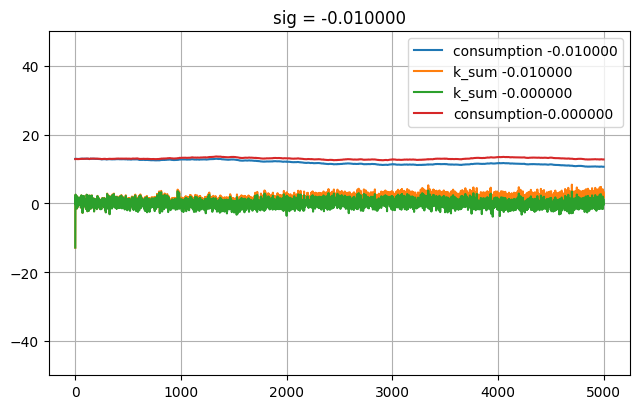

In [876]:
plt.figure(figsize=[6.5, 4.2])
plt.title("sig = %f" % (sig_arr[1]))
plt.ylim(y_lim)
colorlist = ["#FF4B00", "#005AFF", "#03AF7A"]
# Plot consumption
plt.plot(
    np.array(range(iter_t)),
    c[:iter_t],
    linestyle="-",
    label="consumption %f"%sig_arr[1],
    
)

plt.plot(
    np.array(range(iter_t)),
    k_sum[:iter_t],
    linestyle="-",
    label="k_sum %f"%sig_arr[1],
    
)
plt.plot(
    np.array(range(iter_t)),
    k_1_sum[:iter_t],
    linestyle="-",
    label="k_sum %f"%sig_arr[0],
    
)



plt.plot(
    np.array(range(iter_t)),
    c_2[:iter_t],
    linestyle="-",
    label="consumption%f"%sig_arr[0],
    
)



# Plot saving

# Legend with specified arguments
plt.legend()
plt.grid()
plt.tight_layout()

# plt.axhline(y=gan, xmin=0.0, xmax=iter_t, color="r")

plt.savefig("ch10_2.png")

In [877]:
k_get[:3]

array([  0.        , -12.91732108, -13.17803412])

In [878]:
k_get_1[:3]

array([  0.        , -12.86301326, -13.06937266])

## in Qunat

In [879]:
theta_LQ = -1/sig_arr[1]

In [880]:
rblq = qe.RBLQ(QLQ, RLQ, ALQ, BLQ, C=CLQ, beta=beta_LQ, theta=theta_LQ)
F, P, K = rblq.robust_rule()  # Compute value function and decision rule

In [881]:
print(f"-F in Quant w\ mis=  {-F}")
print(f"-F in sargent w\ mis = {-F_ro2}")

-F in Quant w\ mis=  [[-4.91711021 -0.01063744 -0.01021302]]
-F in sargent w\ mis = [[-4.91732108 -0.01063837 -0.01021391]]


## 図を並べる

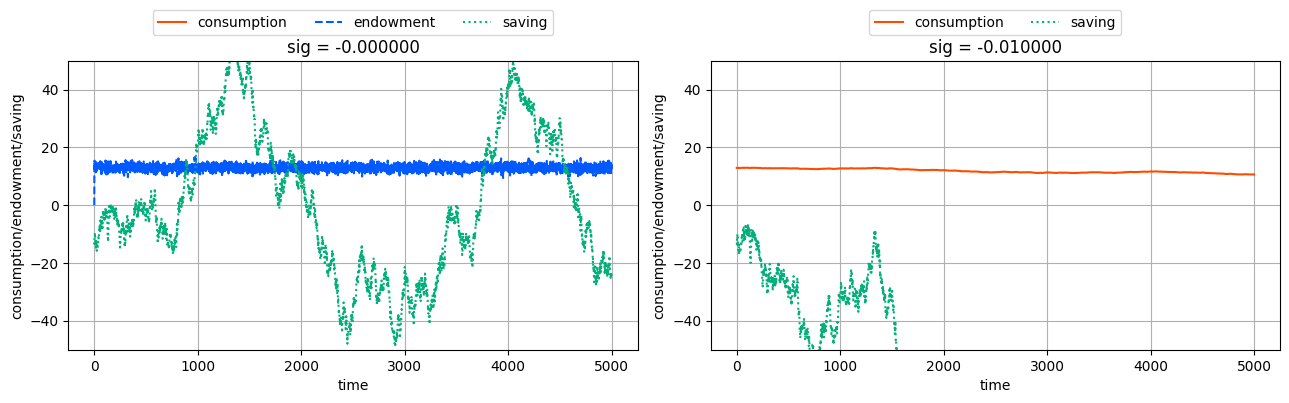

In [882]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[13, 4.2])

# Plot for the left side
axes[1].set_title(f"sig = {sig_arr[1]:.6f}")
axes[1].set_ylim(y_lim)
axes[1].plot(
    np.array(range(iter_t)),
    c[:iter_t],
    linestyle="-",
    label="consumption",
    color=colorlist[0],
)
#axes[1].plot(
#    np.array(range(iter_t)),
#    d_get[:iter_t],
#    linestyle="--",
#    label="endowment",
#    color=colorlist[1],
#)
axes[1].plot(
    np.array(range(iter_t - 1)),
    k_get[1:iter_t],
    linestyle=":",
    label="saving",
    color=colorlist[2],
)
axes[1].legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=3, prop={"size": 10})
axes[1].set_xlabel("time", fontsize=10)
axes[1].set_ylabel("consumption/endowment/saving", fontsize=10)
axes[1].grid()

# Plot for the right side
axes[0].set_title(f"sig = {sig_arr[0]:.6f}")
axes[0].set_ylim(y_lim)
axes[0].plot(
    np.array(range(iter_t)),
    c_2[:iter_t],
    linestyle="-",
    label="consumption",
    color=colorlist[0],
)
""" axes[0].plot(
    np.array(range(iter_t)),
    d_get_1[:iter_t],
    linestyle="--",
    label="endowment",
    color=colorlist[1],
) """
axes[0].plot(
    np.array(range(iter_t - 1)),
    k_get_1[1:iter_t],
    linestyle=":",
    label="saving",
    color=colorlist[2],
)
axes[0].legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=3, prop={"size": 10})
axes[0].set_xlabel("time", fontsize=10)
axes[0].set_ylabel("consumption/endowment/saving", fontsize=10)
axes[0].grid()

# Adjust layout
plt.tight_layout()

# Save the combined plot
plt.savefig("combined_ch10.png")

# Display the combined plot
plt.show()

## 結果がおかしいので振り分けを確認してみる。

### without uncertainty

In [883]:
sum_list = []
for i in range(iter_t):
    total = c_2[i] + k_get_1[i + 1] - R * k_get_1[i] - d_get_1[i]
    # print(type(sum))
    sum_list.append(total)
    print(f"total =  {total}")
    # print(f"eps =  {eps[i]}")

print(f"mean =  {np.mean(sum_list)}")
print(f"std =  {np.std(sum_list)}")

total =  0.0
total =  0.0
total =  -1.7763568394002505e-15
total =  -1.7763568394002505e-15
total =  0.0
total =  0.0
total =  0.0
total =  -1.7763568394002505e-15
total =  1.7763568394002505e-15
total =  -1.7763568394002505e-15
total =  0.0
total =  0.0
total =  0.0
total =  0.0
total =  -1.7763568394002505e-15
total =  -1.7763568394002505e-15
total =  -1.7763568394002505e-15
total =  0.0
total =  0.0
total =  1.7763568394002505e-15
total =  -1.7763568394002505e-15
total =  0.0
total =  1.7763568394002505e-15
total =  0.0
total =  -1.7763568394002505e-15
total =  1.7763568394002505e-15
total =  -1.7763568394002505e-15
total =  0.0
total =  0.0
total =  0.0
total =  0.0
total =  0.0
total =  0.0
total =  0.0
total =  0.0
total =  -1.7763568394002505e-15
total =  -1.7763568394002505e-15
total =  -1.7763568394002505e-15
total =  -1.7763568394002505e-15
total =  0.0
total =  -1.7763568394002505e-15
total =  -1.7763568394002505e-15
total =  1.7763568394002505e-15
total =  0.0
total =  0.0


### with uncertainty

In [884]:
sum_list = []
for i in range(iter_t):
    
    total=c[i]+k_get[i+1]-R*k_get[i]-d_get[i]
    #print(type(sum))
    sum_list.append(total)
    print(f"total =  {total}")
    #print(f"eps =  {eps[i]}")

print(f"mean =  {np.mean(sum_list)}")
print(f"std =  {np.std(sum_list)}")

total =  0.0
total =  -1.7763568394002505e-15
total =  -1.7763568394002505e-15
total =  0.0
total =  -1.7763568394002505e-15
total =  0.0
total =  -1.7763568394002505e-15
total =  -1.7763568394002505e-15
total =  0.0
total =  0.0
total =  0.0
total =  -1.7763568394002505e-15
total =  0.0
total =  1.7763568394002505e-15
total =  0.0
total =  0.0
total =  0.0
total =  -3.552713678800501e-15
total =  0.0
total =  0.0
total =  1.7763568394002505e-15
total =  0.0
total =  -1.7763568394002505e-15
total =  1.7763568394002505e-15
total =  -1.7763568394002505e-15
total =  0.0
total =  0.0
total =  0.0
total =  -1.7763568394002505e-15
total =  0.0
total =  0.0
total =  0.0
total =  1.7763568394002505e-15
total =  1.7763568394002505e-15
total =  1.7763568394002505e-15
total =  0.0
total =  3.552713678800501e-15
total =  1.7763568394002505e-15
total =  0.0
total =  0.0
total =  0.0
total =  0.0
total =  0.0
total =  1.7763568394002505e-15
total =  0.0
total =  0.0
total =  0.0
total =  0.0
total =

### 修正完了

# Observational Equivalence

sig=0の時のFを用いて\betaを調整。

In [885]:
for where, sig in enumerate(sig_arr):
    print(f"when sig = {sig}")
    F, K, P, Pt = olrprobust(beta, A, B, C, Q, R_hyouka, -1e-9)
    nu=-F@C
    alfa2=nu.T@nu
    #print(alfa2)
    beta_hat=1/R+sig*alfa2/(R-1)
    print(f"beta hat = {beta_hat[0][0]}")
    F2, K2, P2, Pt2 = olrprobust(beta_hat, A, B, C, Q, R_hyouka, sig)
    print(f"optimal decision = {-F2[0]}\n")

when sig = -1e-09


sdfgsdfg
sdfgsdfg
beta hat = 0.9899999999890399
sdfgsdfg
sdfgsdfg
optimal decision = [-4.86343478 -0.01052179 -0.01010198]

when sig = -0.01
sdfgsdfg
sdfgsdfg
beta hat = 0.9898903990378232
sdfgsdfg
sdfgsdfg
optimal decision = [-4.86347414 -0.01052187 -0.01010206]



In [886]:
F, K, P, Pt = olrprobust(beta, A, B, C, Q, R_hyouka, -1e-9)
print(f"beta= {beta}")
print(f"optimal decision = {-F[0]}\n")

nu=-F@C
alfa2=nu.T@nu
#print(alfa2)
beta_hat=1/R+sig*alfa2/(R-1)
print(f"beta hat = {beta_hat[0][0]}")
F2, K2, P2, Pt2 = olrprobust(beta_hat, A, B, C, Q, R_hyouka, sig)
print(f"optimal decision = {-F2[0]}\n")

sdfgsdfg
sdfgsdfg
beta= 0.99
optimal decision = [-4.86343479 -0.01052179 -0.01010198]

beta hat = 0.9898903990378232
sdfgsdfg
sdfgsdfg
optimal decision = [-4.86347414 -0.01052187 -0.01010206]

